# 🌳 ML Assignment 6: Complete Decision Tree Practical Solutions

#Question 1:  What is a Decision Tree, and how does it work

ans: A Decision Tree is a flowchart-like structure used for classification or regression. It splits the data into branches based on feature values until it reaches a decision (leaf).

#Question 2:  What are impurity measures in Decision Trees

ans: Impurity measures help evaluate the quality of splits. Common ones:

Gini Impurity

Entropy

Classification Error



#Question 3: What is the mathematical formula for Gini Impurity

ans :  Gini=1−∑p
i
^2
​

Where
𝑝
𝑖
p
i
​
  is the probability of class i.

#Question 4:  What is the mathematical formula for Entropy ?

ans: Entropy=−∑p
i
​
 log
2
​
 (p
i
​
 )

#Question 5: What is Information Gain, and how is it used in Decision Trees

ans: Information Gain is the reduction in entropy after a dataset is split. It helps choose the best feature to split on

#Question 6: What is the difference between Gini Impurity and Entropy

ans: Gini is simpler and faster.

Entropy is more informative but computationally expensive.

Both generally give similar results.

#Question 7: What is the mathematical explanation behind Decision Trees

ans: Decision Trees use recursive binary splitting based on impurity (Gini or Entropy), forming a tree by selecting the best features that maximize Information Gain.

#Question 8:  What is Pre-Pruning in Decision Trees

ans: Stopping tree growth early using constraints like:

max_depth

min_samples_split

#Question 9:  What is Post-Pruning in Decision Trees

ans: Stopping tree growth early using constraints like:

max_depth

min_samples_split

#Question 10: What is the difference between Pre-Pruning and Post-Pruning

ans: Allowing the tree to grow fully and then trimming branches that don’t improve performance (e.g., cost complexity pruning).



#Question 11:  What is a Decision Tree Regressor

ans: A model that predicts continuous values using decision tree logic by minimizing MSE (Mean Squared Error).


#Question 12:  What are the advantages and disadvantages of Decision Trees

ans: Easy to interpret

Works with both numerical and categorical data
Disadvantages

Prone to overfitting

Unstable (small changes in data = different tree)

#Question 13:  How does a Decision Tree handle missing values

ans: it Can use surrogate splits or imputation before training.

#Question 14:  How does a Decision Tree handle categorical features

ans: Most libraries convert categorical to numeric (e.g., label encoding).

Some tree algorithms (like LightGBM) handle them directly.

#Question 15:  What are some real-world applications of Decision Trees

ans: some real world application :

Fraud detection

Medical diagnosis

Customer churn prediction

Credit scoring



# practicle questions:

#Required library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
import graphviz


#Question 1 :  Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy

In [3]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


#Question 2 : Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances

In [4]:
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)
print("Feature Importances (Gini):", clf_gini.feature_importances_)


Feature Importances (Gini): [0.01667014 0.01667014 0.38926487 0.57739485]


#Question 3 :  Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy

In [5]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
print("Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))


Accuracy (Entropy): 1.0


#Question 4  :   Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE)

In [6]:
housing = fetch_california_housing()
Xh_train, Xh_test, yh_train, yh_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

reg = DecisionTreeRegressor()
reg.fit(Xh_train, yh_train)
y_pred_reg = reg.predict(Xh_test)
print("MSE:", mean_squared_error(yh_test, y_pred_reg))


MSE: 0.4931871917192345


#Question 5 :  Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz

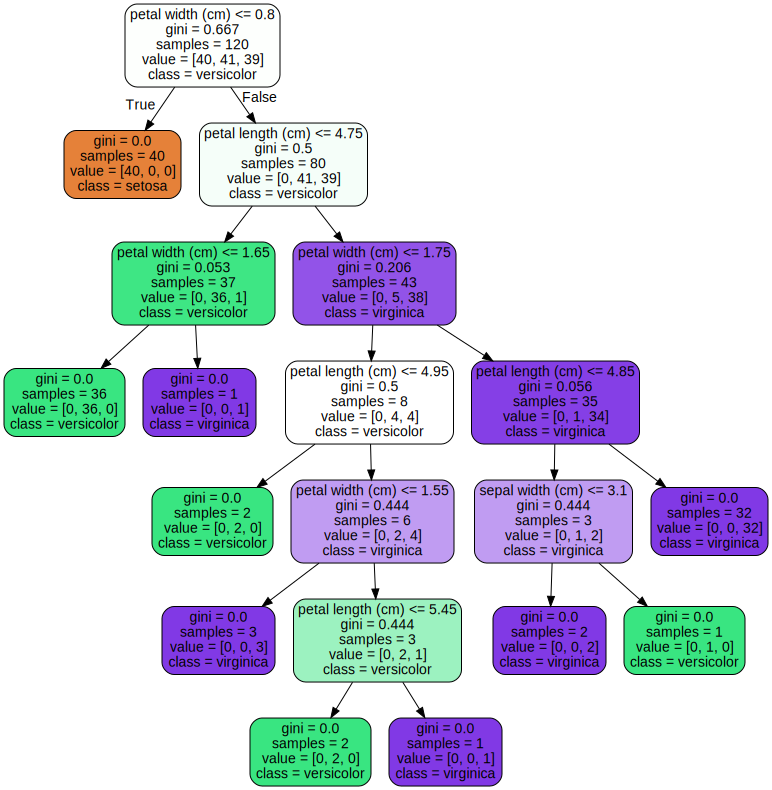

In [7]:
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("iris_tree", format="png", cleanup=False)
graph


#Question 6 :  Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree

In [8]:
clf_depth3 = DecisionTreeClassifier(max_depth=3)
clf_depth3.fit(X_train, y_train)
print("Accuracy (max_depth=3):", accuracy_score(y_test, clf_depth3.predict(X_test)))
print("Accuracy (full tree):", accuracy_score(y_test, clf.predict(X_test)))


Accuracy (max_depth=3): 1.0
Accuracy (full tree): 1.0


#Question 7 :   Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree

In [9]:
clf_split5 = DecisionTreeClassifier(min_samples_split=5)
clf_split5.fit(X_train, y_train)
print("Accuracy (min_samples_split=5):", accuracy_score(y_test, clf_split5.predict(X_test)))
print("Accuracy (default):", accuracy_score(y_test, clf.predict(X_test)))


Accuracy (min_samples_split=5): 1.0
Accuracy (default): 1.0


#Question 8 : Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data

In [10]:
pipeline_scaled = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])
pipeline_scaled.fit(X_train, y_train)
print("Accuracy with Scaling:", accuracy_score(y_test, pipeline_scaled.predict(X_test)))


Accuracy with Scaling: 1.0


#Question 9 : Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification

In [11]:
ovr_clf = OneVsRestClassifier(DecisionTreeClassifier())
ovr_clf.fit(X_train, y_train)
print("Accuracy with OvR:", accuracy_score(y_test, ovr_clf.predict(X_test)))


Accuracy with OvR: 1.0


#Question 10 :  Write a Python program to train a Decision Tree Classifier and display the feature importance scores

In [12]:
print("Feature Importances:", clf.feature_importances_)


Feature Importances: [0.         0.01667014 0.40593501 0.57739485]


#Question 11 :  Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree

In [13]:
reg5 = DecisionTreeRegressor(max_depth=5)
reg5.fit(Xh_train, yh_train)
print("MSE (max_depth=5):", mean_squared_error(yh_test, reg5.predict(Xh_test)))
print("MSE (full tree):", mean_squared_error(yh_test, reg.predict(Xh_test)))


MSE (max_depth=5): 0.5245146178314736
MSE (full tree): 0.4931871917192345


#Question 12 : Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy

In [14]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
acc_list = []

for alpha in ccp_alphas:
    clf_pruned = DecisionTreeClassifier(ccp_alpha=alpha)
    clf_pruned.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf_pruned.predict(X_test))
    acc_list.append((alpha, acc))

print("Alpha and Accuracy:")
for alpha, acc in acc_list:
    print(f"Alpha: {alpha:.4f}, Accuracy: {acc:.4f}")


Alpha and Accuracy:
Alpha: 0.0000, Accuracy: 1.0000
Alpha: 0.0081, Accuracy: 1.0000
Alpha: 0.0111, Accuracy: 1.0000
Alpha: 0.0111, Accuracy: 1.0000
Alpha: 0.0162, Accuracy: 1.0000
Alpha: 0.0241, Accuracy: 0.9667
Alpha: 0.2433, Accuracy: 0.6333
Alpha: 0.3334, Accuracy: 0.3000


#Question 13 : Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score

In [15]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#Question 14 : Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn

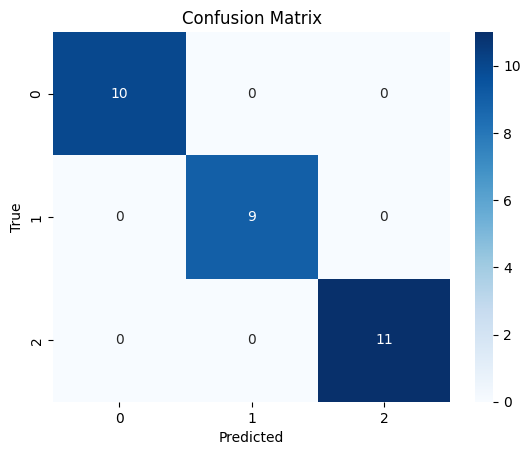

In [16]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#Question 15 : Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split

In [17]:
param_grid = {
    'max_depth': [2, 3, 5, None],
    'min_samples_split': [2, 5, 10]
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validated accuracy:", grid.best_score_)


Best parameters: {'max_depth': None, 'min_samples_split': 2}
Best cross-validated accuracy: 0.9416666666666668
